<a href="https://colab.research.google.com/github/JacionSilva/Projeto_dados_jacion/blob/main/C%C3%B3pia_de_HandsOn4_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means:

Agora vamos utlizar o algoritmo K-Means para classificar e tentar entender dados de forma não supervisionada.

Para isso vamos utilizar um dataset que retrata o comportamento do uso de cartão de crédito de clientes.

Este dataset contém o comportamento de 9000 usuários de cartão durante 6 meses.

Dicionário de dados:

**CUSTID** : Identification of Credit Card holder (Categorical)

**BALANCE** : Balance amount left in their account to make purchases

**BALANCEFREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

**PURCHASES** : Amount of purchases made from account

**ONEOFFPURCHASES** : Maximum purchase amount done in one-go

**INSTALLMENTSPURCHASES** : Amount of purchase done in installment

**CASHADVANCE** : Cash in advance given by the user

**PURCHASESFREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

**ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

**PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

**CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid

**CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"

**PURCHASESTRX** : Numbe of purchase transactions made

**CREDITLIMIT** : Limit of Credit Card for user

**PAYMENTS** : Amount of Payment done by user

**MINIMUM_PAYMENTS** : Minimum amount of payments made by user

**PRCFULLPAYMENT** : Percent of full payment paid by user

**TENURE** : Tenure of credit card service for user

In [ ]:
#do Professor
!wget https://raw.githubusercontent.com/jpvmm/puc_ds/main/dataset_kmeans.csv

In [ ]:
#DataSets do projeto
! wget https://github.com/JacionSilva/Projeto_dados_jacion/blob/main/sample_submission.csv

! wget https://github.com/JacionSilva/Projeto_dados_jacion/blob/main/test.csv
! wget https://github.com/JacionSilva/Projeto_dados_jacion/blob/main/train.csv

In [ ]:
!pip install yellowbrick

In [121]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import statsmodels.formula.api as sm
import scipy.stats as stats
#gerador de combinações para validar meus modelos:
from itertools import combinations

pd.set_option('display.max_columns', 500)

# Erro na importação e tratamento
durante a leitura do arquivo, percebemos que existiam alguns erros e para tratar eles, tiramos os espaços em branco com a biblioteca csv

In [65]:
# Primeiro, lemos o arquivo linha por linha
with open('sample_submission.csv', 'r') as f:
    reader = csv.reader(f)
    lines = list(reader)

# Substituímos os espaços por underscores na primeira linha (que contém os nomes das colunas)
lines[0] = [col.replace(' ', '_') for col in lines[0]]

# Agora, escrevemos as linhas de volta no arquivo
with open('sample_submission.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(lines)

#criando o dataframe
df_ss = pd.read_csv('sample_submission.csv')
#tratando o dataframe, para substituir os caracter especiais

df_ss.columns = df_ss.columns.str.replace('(', '_').str.replace(')', '_')

In [66]:
# Primeiro, lemos o arquivo linha por linha
with open('test.csv', 'r') as f:
    reader = csv.reader(f)
    lines = list(reader)

# Substituímos os espaços por underscores na primeira linha (que contém os nomes das colunas)
lines[0] = [col.replace(' ', '_') for col in lines[0]]

# Agora, escrevemos as linhas de volta no arquivo
with open('test.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(lines)

#criando o dataframe
df_test = pd.read_csv('test.csv')
#tratando o dataframe, para substituir os caracter especiais

df_test.columns = df_test.columns.str.replace('(', '_').str.replace(')', '_')

In [67]:
# Primeiro, lemos o arquivo linha por linha
with open('train.csv', 'r') as f:
    reader = csv.reader(f)
    lines = list(reader)

# Substituímos os espaços por underscores na primeira linha (que contém os nomes das colunas)
lines[0] = [col.replace(' ', '_') for col in lines[0]]

# Agora, escrevemos as linhas de volta no arquivo
with open('train.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(lines)

#criando o dataframe
df_train = pd.read_csv('train.csv')
#tratando o dataframe, para substituir os caracter especiais

df_train.columns = df_train.columns.str.replace('(', '_').str.replace(')', '_')

In [68]:
df_train.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine_protein,serum_creatinine,AST,ALT,Gtp,dental_caries,smoking
0,0,40.0,165.0,60.0,73.0,1.0,1.0,1.0,1.0,106.0,70.0,89.0,178.0,72.0,69.0,93.0,13.4,1.0,0.8,20.0,18.0,19.0,0.0,0.0
1,1,40.0,170.0,65.0,82.0,1.2,1.2,1.0,1.0,110.0,75.0,98.0,189.0,98.0,58.0,111.0,14.0,1.0,0.9,17.0,14.0,17.0,0.0,0.0
2,2,60.0,155.0,50.0,72.0,0.7,0.8,1.0,1.0,118.0,78.0,94.0,184.0,75.0,65.0,105.0,14.4,1.0,0.9,21.0,24.0,15.0,0.0,0.0
3,3,40.0,170.0,70.0,86.0,1.0,1.0,1.0,1.0,98.0,64.0,104.0,192.0,56.0,58.0,123.0,15.8,1.0,1.0,24.0,25.0,42.0,0.0,0.0
4,4,60.0,155.0,55.0,85.0,0.6,0.7,1.0,1.0,130.0,79.0,97.0,185.0,127.0,61.0,99.0,12.7,1.0,0.8,28.0,25.0,32.0,0.0,0.0


In [69]:
df_test.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine_protein,serum_creatinine,AST,ALT,Gtp,dental_caries
0,15000,45.0,175.0,65.0,76.0,1.2,1.0,1.0,1.0,118.0,76.0,95.0,165.0,63.0,55.0,98.0,15.5,1.0,0.8,22.0,21.0,23.0,0.0
1,15001,40.0,175.0,70.0,79.0,1.2,1.2,1.0,1.0,125.0,80.0,107.0,200.0,111.0,52.0,126.0,15.5,1.0,0.8,17.0,15.0,29.0,1.0
2,15002,55.0,155.0,60.0,84.5,1.2,0.8,1.0,1.0,124.0,82.0,99.0,262.0,202.0,62.0,161.0,13.5,1.0,0.8,21.0,13.0,16.0,0.0
3,15003,55.0,170.0,65.0,80.0,1.2,1.2,1.0,1.0,130.0,80.0,112.0,176.0,108.0,46.0,108.0,14.7,1.0,1.1,16.0,13.0,35.0,1.0
4,15004,35.0,180.0,75.0,82.3,1.2,1.2,1.0,1.0,113.0,70.0,72.0,198.0,87.0,60.0,120.0,15.0,1.0,0.9,22.0,15.0,20.0,0.0


In [70]:
#unido os dataframe df_ss e df_test
df_ss_test = df_test.merge(df_ss, on='id')

In [73]:
df_ss_test.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine_protein,serum_creatinine,AST,ALT,Gtp,dental_caries,smoking
0,15000,45.0,175.0,65.0,76.0,1.2,1.0,1.0,1.0,118.0,76.0,95.0,165.0,63.0,55.0,98.0,15.5,1.0,0.8,22.0,21.0,23.0,0.0,0.5
1,15001,40.0,175.0,70.0,79.0,1.2,1.2,1.0,1.0,125.0,80.0,107.0,200.0,111.0,52.0,126.0,15.5,1.0,0.8,17.0,15.0,29.0,1.0,0.5
2,15002,55.0,155.0,60.0,84.5,1.2,0.8,1.0,1.0,124.0,82.0,99.0,262.0,202.0,62.0,161.0,13.5,1.0,0.8,21.0,13.0,16.0,0.0,0.5
3,15003,55.0,170.0,65.0,80.0,1.2,1.2,1.0,1.0,130.0,80.0,112.0,176.0,108.0,46.0,108.0,14.7,1.0,1.1,16.0,13.0,35.0,1.0,0.5
4,15004,35.0,180.0,75.0,82.3,1.2,1.2,1.0,1.0,113.0,70.0,72.0,198.0,87.0,60.0,120.0,15.0,1.0,0.9,22.0,15.0,20.0,0.0,0.5


In [74]:
#unindo os dataframes df_ss_test ao df_train horizontamente
df_train = pd.concat([df_train, df_ss_test])

In [75]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   35000 non-null  int64  
 1   age                  35000 non-null  float64
 2   height_cm_           35000 non-null  float64
 3   weight_kg_           35000 non-null  float64
 4   waist_cm_            35000 non-null  float64
 5   eyesight_left_       35000 non-null  float64
 6   eyesight_right_      35000 non-null  float64
 7   hearing_left_        35000 non-null  float64
 8   hearing_right_       35000 non-null  float64
 9   systolic             35000 non-null  float64
 10  relaxation           35000 non-null  float64
 11  fasting_blood_sugar  35000 non-null  float64
 12  Cholesterol          35000 non-null  float64
 13  triglyceride         35000 non-null  float64
 14  HDL                  35000 non-null  float64
 15  LDL                  35000 non-null  float

In [76]:
print(df_train.shape)
df_train.head()


(35000, 24)


,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine_protein,serum_creatinine,AST,ALT,Gtp,dental_caries,smoking
0,0,40.0,165.0,60.0,73.0,1.0,1.0,1.0,1.0,106.0,70.0,89.0,178.0,72.0,69.0,93.0,13.4,1.0,0.8,20.0,18.0,19.0,0.0,0.0
1,1,40.0,170.0,65.0,82.0,1.2,1.2,1.0,1.0,110.0,75.0,98.0,189.0,98.0,58.0,111.0,14.0,1.0,0.9,17.0,14.0,17.0,0.0,0.0
2,2,60.0,155.0,50.0,72.0,0.7,0.8,1.0,1.0,118.0,78.0,94.0,184.0,75.0,65.0,105.0,14.4,1.0,0.9,21.0,24.0,15.0,0.0,0.0
3,3,40.0,170.0,70.0,86.0,1.0,1.0,1.0,1.0,98.0,64.0,104.0,192.0,56.0,58.0,123.0,15.8,1.0,1.0,24.0,25.0,42.0,0.0,0.0
4,4,60.0,155.0,55.0,85.0,0.6,0.7,1.0,1.0,130.0,79.0,97.0,185.0,127.0,61.0,99.0,12.7,1.0,0.8,28.0,25.0,32.0,0.0,0.0


In [77]:
df_train.columns

Index(['id', 'age', 'height_cm_', 'weight_kg_', 'waist_cm_', 'eyesight_left_',
       'eyesight_right_', 'hearing_left_', 'hearing_right_', 'systolic',
       'relaxation', 'fasting_blood_sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine_protein', 'serum_creatinine', 'AST',
       'ALT', 'Gtp', 'dental_caries', 'smoking'],
      dtype='object')

In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   35000 non-null  int64  
 1   age                  35000 non-null  float64
 2   height_cm_           35000 non-null  float64
 3   weight_kg_           35000 non-null  float64
 4   waist_cm_            35000 non-null  float64
 5   eyesight_left_       35000 non-null  float64
 6   eyesight_right_      35000 non-null  float64
 7   hearing_left_        35000 non-null  float64
 8   hearing_right_       35000 non-null  float64
 9   systolic             35000 non-null  float64
 10  relaxation           35000 non-null  float64
 11  fasting_blood_sugar  35000 non-null  float64
 12  Cholesterol          35000 non-null  float64
 13  triglyceride         35000 non-null  float64
 14  HDL                  35000 non-null  float64
 15  LDL                  35000 non-null  float

In [79]:
#Vamos procurar por valores nulos
df_train.isna().sum()

id                     0
age                    0
height_cm_             0
weight_kg_             0
waist_cm_              0
eyesight_left_         0
eyesight_right_        0
hearing_left_          0
hearing_right_         0
systolic               0
relaxation             0
fasting_blood_sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine_protein          0
serum_creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental_caries          0
smoking                0
dtype: int64

In [80]:
#Vamos dropar colunas identificadoras
df_train = df_train.drop(['id'], axis=1)

In [81]:
df_train.head()

,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine_protein,serum_creatinine,AST,ALT,Gtp,dental_caries,smoking
0,40.0,165.0,60.0,73.0,1.0,1.0,1.0,1.0,106.0,70.0,89.0,178.0,72.0,69.0,93.0,13.4,1.0,0.8,20.0,18.0,19.0,0.0,0.0
1,40.0,170.0,65.0,82.0,1.2,1.2,1.0,1.0,110.0,75.0,98.0,189.0,98.0,58.0,111.0,14.0,1.0,0.9,17.0,14.0,17.0,0.0,0.0
2,60.0,155.0,50.0,72.0,0.7,0.8,1.0,1.0,118.0,78.0,94.0,184.0,75.0,65.0,105.0,14.4,1.0,0.9,21.0,24.0,15.0,0.0,0.0
3,40.0,170.0,70.0,86.0,1.0,1.0,1.0,1.0,98.0,64.0,104.0,192.0,56.0,58.0,123.0,15.8,1.0,1.0,24.0,25.0,42.0,0.0,0.0
4,60.0,155.0,55.0,85.0,0.6,0.7,1.0,1.0,130.0,79.0,97.0,185.0,127.0,61.0,99.0,12.7,1.0,0.8,28.0,25.0,32.0,0.0,0.0


<Axes: >

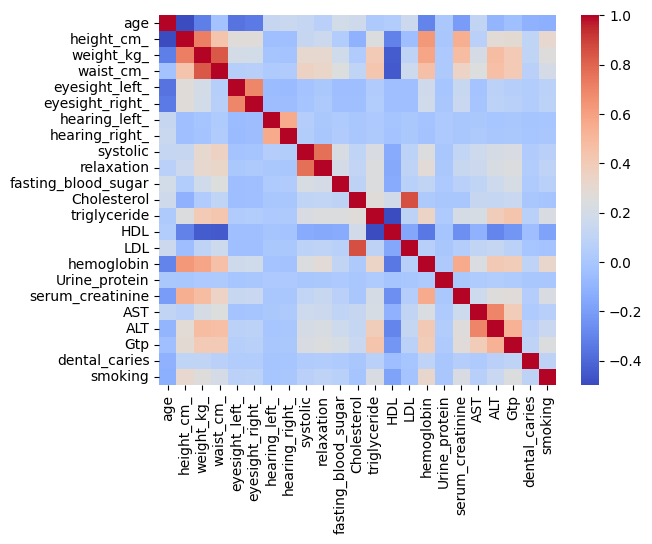

In [82]:
#obtendo a correção e por meio dela vamos conseguir ver a força entre as variaveis.
corr = df_train.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f')

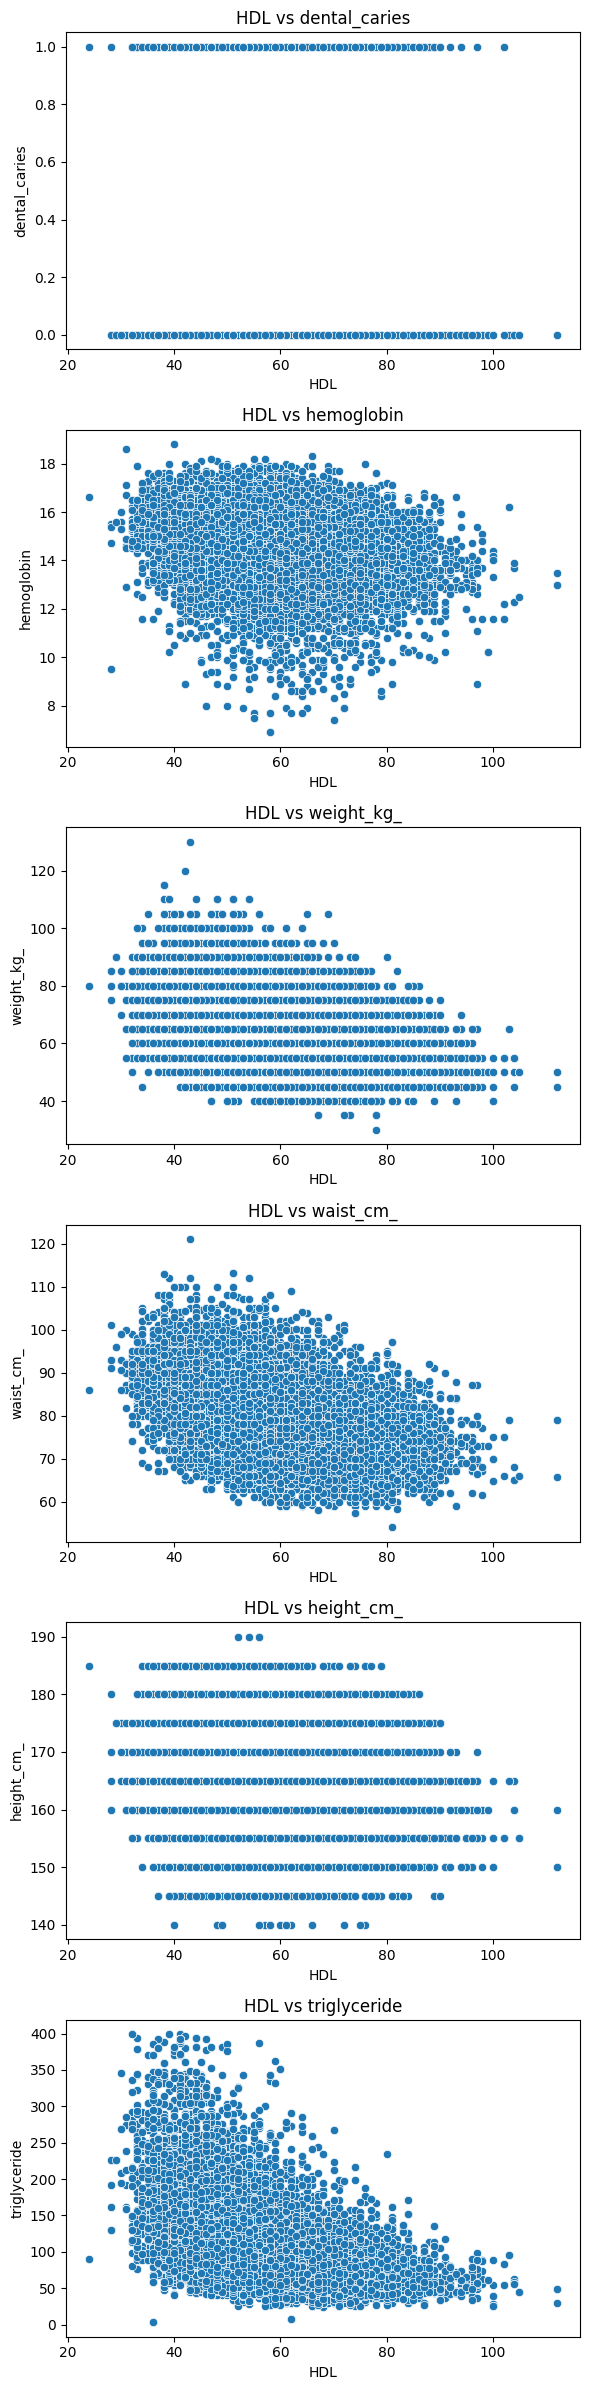

In [84]:
#Analisnando os pares para ver as coorelações
column_pairs = [('HDL','dental_caries'),('HDL','hemoglobin'),('HDL','weight_kg_'),('HDL','waist_cm_'),('HDL','height_cm_'),('HDL','triglyceride')]
#calculando o numero de pares
n_plots = len(column_pairs)

fig, axes = plt.subplots(nrows=n_plots, ncols=1, figsize=(6,4 * n_plots))

#percorredo o numero do gráfico.
for i, pair in enumerate(column_pairs):
  x_col, y_col = pair
  sns.scatterplot(x=x_col, y=y_col,data=df_train, ax=axes[i])
  axes[i].set_title(f'{x_col} vs {y_col}')

plt.tight_layout()
plt.show()

In [140]:
#aic 1.106e+05, BIC:	1.106e+05, Df Residuals:	14997, R-squared:	0.286, Adj. R-squared:	0.286, F-statistic:	3006.
modelo1 = sm.ols(formula='HDL ~ hemoglobin + triglyceride', data=df_train).fit()
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HDL   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     6900.
Date:                Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                        00:18:29   Log-Likelihood:            -1.2904e+05
No. Observations:               35000   AIC:                         2.581e+05
Df Residuals:                   34997   BIC:                         2.581e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       91.6020      0.549    166.781      0.000      90.525      92.678
hemoglobin      -1.6257      0.040    -40.994      0.000      -1.703      -1.548
triglyceride    -0.1031      0.001    -89.499      0.000      -0.105      -0.101
==============================================================================
Omnibus:                     1293.330   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1443.695
Skew:                           0.482   Prob(JB):                         0.00
Kurtosis:                       3.244   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
df_train.head()

,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine_protein,serum_creatinine,AST,ALT,Gtp,dental_caries,smoking
0,40.0,165.0,60.0,73.0,1.0,1.0,1.0,1.0,106.0,70.0,89.0,178.0,72.0,69.0,93.0,13.4,1.0,0.8,20.0,18.0,19.0,0.0,0.0
1,40.0,170.0,65.0,82.0,1.2,1.2,1.0,1.0,110.0,75.0,98.0,189.0,98.0,58.0,111.0,14.0,1.0,0.9,17.0,14.0,17.0,0.0,0.0
2,60.0,155.0,50.0,72.0,0.7,0.8,1.0,1.0,118.0,78.0,94.0,184.0,75.0,65.0,105.0,14.4,1.0,0.9,21.0,24.0,15.0,0.0,0.0
3,40.0,170.0,70.0,86.0,1.0,1.0,1.0,1.0,98.0,64.0,104.0,192.0,56.0,58.0,123.0,15.8,1.0,1.0,24.0,25.0,42.0,0.0,0.0
4,60.0,155.0,55.0,85.0,0.6,0.7,1.0,1.0,130.0,79.0,97.0,185.0,127.0,61.0,99.0,12.7,1.0,0.8,28.0,25.0,32.0,0.0,0.0


In [139]:
#aic 1.106e+05, BIC:	1.106e+05, Df Residuals:	14997, R-squared:	0.286, Adj. R-squared:	0.286, F-statistic:	3006.
modelo2 = sm.ols(formula='HDL ~ triglyceride', data=df_train).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HDL   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                 1.156e+04
Date:                Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                        00:18:24   Log-Likelihood:            -1.2986e+05
No. Observations:               35000   AIC:                         2.597e+05
Df Residuals:                   34998   BIC:                         2.597e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       69.6503      0.125    557.218      0.000      69.405      69.895
triglyceride    -0.1192      0.001   -107.535      0.000      -0.121      -0.117
==============================================================================
Omnibus:                     1266.531   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1407.583
Skew:                           0.482   Prob(JB):                    2.22e-306
Kurtosis:                       3.188   Cond. No.                         267.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
df_train.head()

,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine_protein,serum_creatinine,AST,ALT,Gtp,dental_caries,smoking
0,40.0,165.0,60.0,73.0,1.0,1.0,1.0,1.0,106.0,70.0,89.0,178.0,72.0,69.0,93.0,13.4,1.0,0.8,20.0,18.0,19.0,0.0,0.0
1,40.0,170.0,65.0,82.0,1.2,1.2,1.0,1.0,110.0,75.0,98.0,189.0,98.0,58.0,111.0,14.0,1.0,0.9,17.0,14.0,17.0,0.0,0.0
2,60.0,155.0,50.0,72.0,0.7,0.8,1.0,1.0,118.0,78.0,94.0,184.0,75.0,65.0,105.0,14.4,1.0,0.9,21.0,24.0,15.0,0.0,0.0
3,40.0,170.0,70.0,86.0,1.0,1.0,1.0,1.0,98.0,64.0,104.0,192.0,56.0,58.0,123.0,15.8,1.0,1.0,24.0,25.0,42.0,0.0,0.0
4,60.0,155.0,55.0,85.0,0.6,0.7,1.0,1.0,130.0,79.0,97.0,185.0,127.0,61.0,99.0,12.7,1.0,0.8,28.0,25.0,32.0,0.0,0.0


In [91]:
df_train_silver = df_train.drop(['smoking'], axis=1)

In [93]:
df_train_silver.head()

,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine_protein,serum_creatinine,AST,ALT,Gtp,dental_caries
0,40.0,165.0,60.0,73.0,1.0,1.0,1.0,1.0,106.0,70.0,89.0,178.0,72.0,69.0,93.0,13.4,1.0,0.8,20.0,18.0,19.0,0.0
1,40.0,170.0,65.0,82.0,1.2,1.2,1.0,1.0,110.0,75.0,98.0,189.0,98.0,58.0,111.0,14.0,1.0,0.9,17.0,14.0,17.0,0.0
2,60.0,155.0,50.0,72.0,0.7,0.8,1.0,1.0,118.0,78.0,94.0,184.0,75.0,65.0,105.0,14.4,1.0,0.9,21.0,24.0,15.0,0.0
3,40.0,170.0,70.0,86.0,1.0,1.0,1.0,1.0,98.0,64.0,104.0,192.0,56.0,58.0,123.0,15.8,1.0,1.0,24.0,25.0,42.0,0.0
4,60.0,155.0,55.0,85.0,0.6,0.7,1.0,1.0,130.0,79.0,97.0,185.0,127.0,61.0,99.0,12.7,1.0,0.8,28.0,25.0,32.0,0.0


In [158]:
#obtendo as colunas do dataframe df_train
colunas = df_train.columns.tolist()

#gerando todas as combinações de pares de colunas
combinacoes = list(combinations(colunas, 2))

#Agora vamos testar as combinações com um for

for comb in combinacoes:
    formula = f'{comb[0]} ~ {comb[1]}'
    modelo = sm.ols(formula=formula, data=df_train).fit()
    print(modelo.summary())

A saída de streaming foi truncada nas últimas 5000 linhas.
Dep. Variable:             weight_kg_   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     325.3
Date:                Mon, 06 May 2024   Prob (F-statistic):           2.11e-72
Time:                        00:32:27   Log-Likelihood:            -1.3357e+05
No. Observations:               35000   AIC:                         2.671e+05
Df Residuals:                   34998   BIC:                         2.672e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.8290      0.365    158.360      0.000      57.113      

In [131]:
!pip install pandas

In [132]:
import pandas as pd
import statsmodels.formula.api as sm
from itertools import combinations

# Obter as colunas do DataFrame df_train
colunas = df_train.columns.tolist()

# Gerar todas as combinações de pares de colunas
combinacoes = list(combinations(colunas, 2))

# Criar uma lista para armazenar os resultados
resultados = []

# Testar as combinações com um loop for
for comb in combinacoes:
    formula = f'{comb[0]} ~ {comb[1]}'
    modelo = sm.ols(formula=formula, data=df_train).fit()

    # Adicionar os resultados à lista
    resultados.append({
        'combinação': comb,
        'R-squared': modelo.rsquared,
        'coef_intercept': modelo.params[0],
        'coef_predictor': modelo.params[1],
        'pvalue_intercept': modelo.pvalues[0],
        'pvalue_predictor': modelo.pvalues[1],
        'AIC': modelo.aic,
        'BIC': modelo.bic,
        'Log-Likelihood': modelo.llf
    })

# Converter a lista em um DataFrame
df_resultados = pd.DataFrame(resultados)


<ipython-input-132-5272b2def63b>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'coef_intercept': modelo.params[0],
<ipython-input-132-5272b2def63b>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'coef_predictor': modelo.params[1],
<ipython-input-132-5272b2def63b>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'pvalue_intercept': modelo.pvalues[0],
<ipython-input-132-5272b2def63b>:26: FutureWarning: Series.__getitem__ treat

In [ ]:
df_resultados.head()

In [113]:
#ordenando algumas colunas para entender melhor os resultados R-squared:
df_resultados = df_resultados.sort_values(by=['R-squared'], ascending=False)
df_resultados.head()

,combinação,R-squared,coef_intercept,coef_predictor,pvalue_intercept,pvalue_predictor,AIC,BIC,Log-Likelihood
189,"(Cholesterol, LDL)",0.731695,84.065713,0.946394,0.0,0.0,264578.813864,264595.740070,-132287.406932
43,"(weight_kg_, waist_cm_)",0.690498,-28.169841,1.151117,0.0,0.0,226425.706894,226442.633100,-113210.853447
148,"(systolic, relaxation)",0.582253,38.746626,1.074814,0.0,0.0,238083.566473,238100.492680,-119039.783237
22,"(height_cm_, weight_kg_)",0.516546,128.887399,0.555741,0.0,0.0,224034.435803,224051.362010,-112015.217901
243,"(AST, ALT)",0.485585,14.146445,0.390853,0.0,0.0,199374.719707,199391.645914,-99685.359854


In [133]:
#ordenando algumas colunas para entender melhor os resultados R-squared:
df_resultados = df_resultados.sort_values(by=['AIC'], ascending=False)
df_resultados.head()

,combinação,R-squared,coef_intercept,coef_predictor,pvalue_intercept,pvalue_predictor,AIC,BIC,Log-Likelihood
201,"(triglyceride, Urine_protein)",0.000548,94.931028,7.135180,0.0,1.197729e-05,369819.985926,369836.912132,-184907.992963
206,"(triglyceride, dental_caries)",0.004629,100.870586,9.327952,0.0,3.391203e-37,369676.747407,369693.673613,-184836.373703
199,"(triglyceride, LDL)",0.007909,76.182188,0.229267,0.0,2.155325e-62,369561.235642,369578.161849,-184778.617821
202,"(triglyceride, serum_creatinine)",0.043659,50.563549,59.551649,0.0,0.000000e+00,368276.728619,368293.654826,-184136.364310
203,"(triglyceride, AST)",0.044632,63.541045,1.730116,0.0,0.000000e+00,368241.111129,368258.037335,-184118.555564


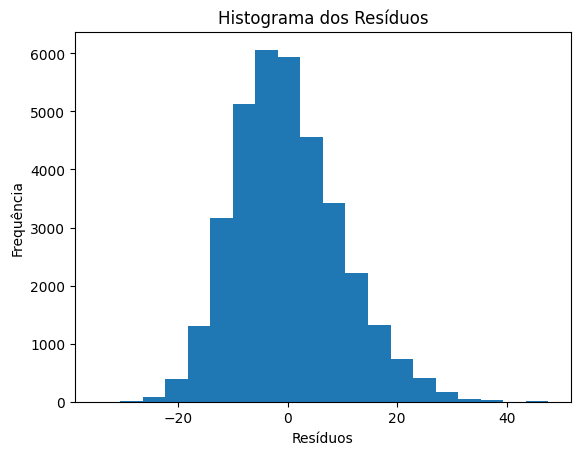

In [146]:
#olhando nossos residuos não tem formato de sino e por isso podemos dizer que não tem relevância
residuos = modelo1.resid
plt.hist(residuos, bins=20)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()

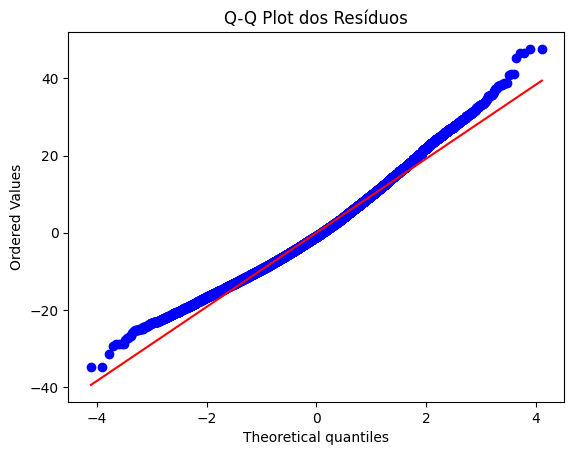

In [147]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Agora você pode usar stats.probplot
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot dos Resíduos")
plt.show()

In [154]:
# h0 - dados estão normalmente distribuídos
# p <= 0.05 rejeito a hipótese nula, (não estão normalmente distribuídos)
# p > 0.05 não é possível rejeitar a h0
import scipy.stats as stats
stats, pvalue = stats.shapiro(residuos)
print("Estatística de Shapiro-Wilk:", stats)
print("Valor-p:", pvalue)

Estatística de Shapiro-Wilk: 0.9864641427993774
Valor-p: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [156]:
# h0 - dados estão normalmente distribuídos
# p <= 0.05 rejeito a hipótese nula, (não estão normalmente distribuídos)
# p > 0.05 não é possível rejeitar a h0
import scipy.stats as stats
stats, pvalue = stats.shapiro(residuos)
print(f'Shapiro-Wilk statística: {stats:.3f}, p-value: {pvalue:.3f}')

Shapiro-Wilk statística: 0.986, p-value: 0.000


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Testado até esse ponto.

In [ ]:
#FE
import numpy as np
df['MEAN_PURCHASE'] = df['BALANCE']/df["PURCHASES"]

df["MEAN_PURCHASE"] = df.MEAN_PURCHASE.apply(lambda x: -1 if x == np.inf else x)
df['MEAN_PURCHASE'] = df['MEAN_PURCHASE'].fillna(df['MEAN_PURCHASE'].mean())

In [ ]:
df['ADVANCE_MEAN'] = df['CASH_ADVANCE']/df["BALANCE"]
df["ADVANCE_MEAN"] = df.ADVANCE_MEAN.apply(lambda x: -1 if x == np.inf else x)
df['ADVANCE_MEAN'] = df['MEAN_PURCHASE'].fillna(df['MEAN_PURCHASE'].mean())

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_train = scaler.fit_transform(df)

In [ ]:
df_train.shape

## Elbow Method

Com esta técnica podemos visualizar o número ótimo de clusters que melhor divide os dados em grupos

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
from yellowbrick.cluster import InterclusterDistance

#Vamos dar uma olhada como nossos clusters ficam
model = KMeans(5, random_state=42)
visualizer = InterclusterDistance(model)

visualizer.fit(df_train)
visualizer.show()

In [ ]:
labels = model.predict(df)
df['clusters']  = labels

In [ ]:
df.clusters.value_counts()

In [ ]:
!pip install ydata_profiling

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Teste")

In [ ]:
profile.to_notebook_iframe()

In [ ]:
df.head()

In [ ]:
agg_func = {
    "BALANCE": ["max", "min", "std", "mean"],
    "BALANCE_FREQUENCY": ["max", "min", "std", "mean"],
    "PURCHASES": ["max", "min", "std", "mean"],
    "CASH_ADVANCE": ["max", "min", "std", "mean"],
    "CREDIT_LIMIT": ["max", "min", "std", "mean"],
    "PAYMENTS": ["max", "min", "std", "mean"]
}

df_grouped = df.groupby("clusters").agg(agg_func)

#DEIXAR BONITO
flat_cols = []

for i in df_grouped.columns:
    flat_cols.append(i[0]+'_'+i[1])

df_grouped.columns = flat_cols

df_grouped = df_grouped.reset_index()
df_grouped

# Exercício



1.   Tente melhorar a distância entre os clusters de forma a criar clusters mais robustos;
2.   Tente explicar e mapear o comportamento dos clientes em cada cluster.

